In [1]:
%pip install openpyxl
%pip install matplotlib
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python\Python39\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python\Python39\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def split_and_explode_column(df : pd.DataFrame, col : str, sep : str = ";"):

    df = df.copy()

    df[col] = (
        df[col].str.split(sep)
    )

    df = df.explode(col)

    return df


# Overall survey responses

In [4]:
df_responses = pd.read_excel("Tech & Engineering Survey(1-34)_edited.xlsx")

In [5]:
df_responses.columns

Index(['ID', 'Start time', 'Completion time', 'Email', 'Name',
       'Last modified time', 'What is your legacy team?  ',
       'What is your current team?',
       'Which platforms have you used in the last 12 months? ',
       'Which cloud computing services do you have access to?',
       'If you have access to any of the services in Question 4, what do you use them for?',
       'Which IDE do you currently use most frequently?',
       'Are there any packages/tools/IDEs you need but are unable to access in the platform you use?',
       'Which programming languages have you used in the last 12 months? ',
       'What is your single most common pattern of working and tech stack? please try to include the main tool and platform you use',
       'Which organisational cloud repositories do you have access to?',
       'Which dashboarding tools do you have access to?',
       'Where do you store your project files?',
       'What do you use as team knowledge store? ',
       'Which to

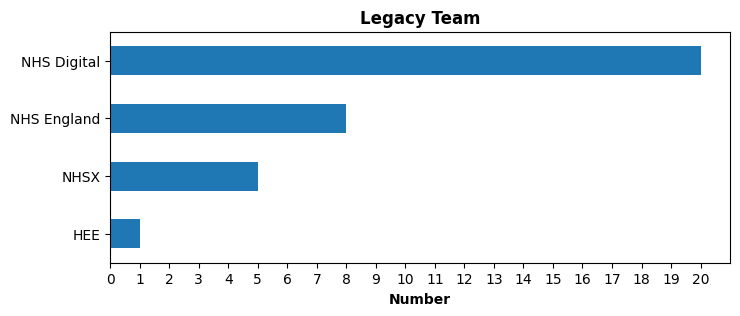

In [53]:
df_responses["What is your legacy team?\xa0\xa0"].value_counts(ascending=True).plot(kind="barh", figsize = (8,3))
plt.xlabel("Number", fontweight = "bold")
plt.title("Legacy Team", fontweight = "bold")
plt.xticks(range(0,21));


Text(0.5, 1.0, 'Current Team')

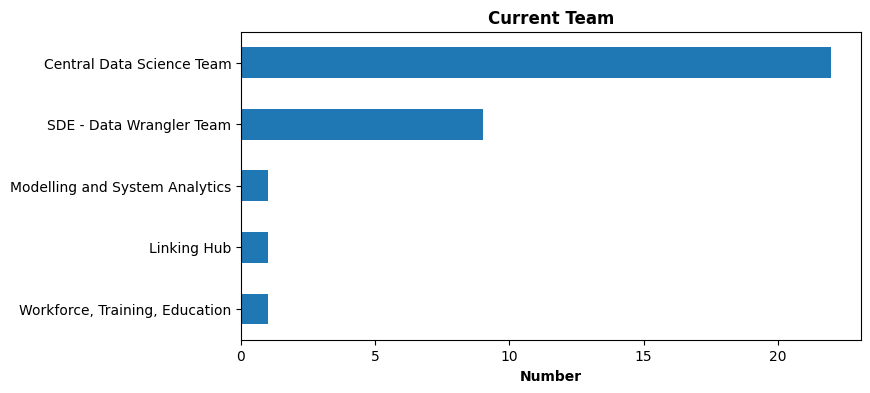

In [54]:
df_responses["What is your current team?"].value_counts(ascending=True).plot(kind="barh", figsize = (8,4))
plt.xlabel("Number", fontweight = "bold")
plt.title("Current Team", fontweight = "bold")

Text(0.5, 1.0, 'Which platforms have you used in the last 12 months?\xa0')

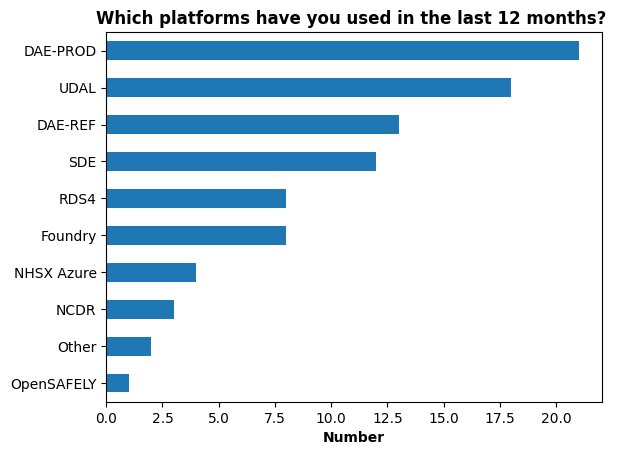

In [29]:
chosen_col = "Which platforms have you used in the last 12 months?\xa0"
accepted_platforms = ['DAE-PROD', 'Foundry', 'DAE-REF', 'UDAL', 'NCDR',
       'SDE', 'RDS4', 'NHSX Azure', 'OpenSAFELY']

accepted_responses = accepted_platforms

df_responses_long = split_and_explode_column(df_responses, col = chosen_col)

df_responses_long = df_responses_long.reset_index()

df_responses_long=df_responses_long[df_responses_long[chosen_col]!=""]

accepted_responses = df_responses_long[chosen_col].unique()


df_responses_long[chosen_col] = np.where(df_responses_long[chosen_col].isin(accepted_platforms),
                                         df_responses_long[chosen_col],
                                         "Other")

df_responses_long[chosen_col].value_counts(ascending = True).plot(kind="barh", )
plt.xlabel("Number", fontweight = "bold")
plt.title(chosen_col, fontweight = "bold")

Text(0.5, 1.0, 'Which cloud computing services do you have access to?')

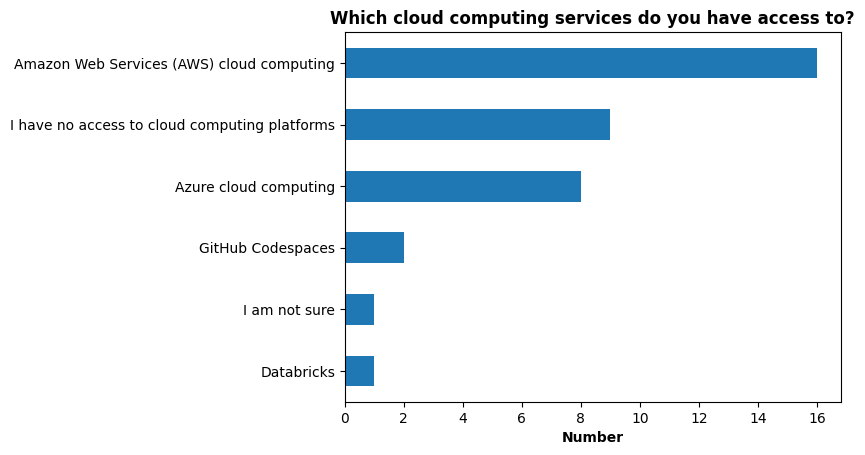

In [27]:
chosen_col = "Which cloud computing services do you have access to?"

df_responses_long = split_and_explode_column(df_responses, col = chosen_col)

df_responses_long = df_responses_long.reset_index()

df_responses_long=df_responses_long[df_responses_long[chosen_col]!=""]

df_responses_long[chosen_col] = np.where(df_responses_long[chosen_col] == "AWS cloud computing", 
                                         "Amazon Web Services (AWS) cloud computing",
                                         df_responses_long[chosen_col])

accepted_responses = df_responses_long[chosen_col].unique()


df_responses_long[chosen_col] = np.where(df_responses_long[chosen_col].isin(accepted_responses),
                                         df_responses_long[chosen_col],
                                         "Other")

df_responses_long[chosen_col].value_counts(ascending = True).plot(kind="barh", )
#plt.yticks(range(0,15));
plt.xlabel("Number", fontweight = "bold")
plt.title(chosen_col, fontweight = "bold")

In [10]:
df_responses["Which IDE do you currently use most frequently?"].value_counts()

VS Code                                                                       10
VSCode                                                                         6
DAE                                                                            2
VS code                                                                        2
Rarely! but I guess I'd turn to PyCharm.                                       1
Jet Brains - Goland                                                            1
Visual Studio Code                                                             1
None.  Just Databricks                                                         1
VS code (outside of dae)                                                       1
vs code                                                                        1
Neovim                                                                         1
unfortunately databricks in DAE, but for my other work, Visual Studio Code     1
I don't know what an IDE is 

In [ ]:
# Which programming languages have you used in the last 12 months? 

In [21]:
df_responses_long["Which programming languages have you used in the last 12 months?\xa0"].unique()

array(['R', 'python', 'SQL', 'bash',
       'SQL is NOT a programming language!!', 'Java',
       'GoLang, Assembly (ARM), Haskell, C',
       'Julia, JavaScript, Rust, scala'], dtype=object)

Text(0.5, 1.0, 'Which programming languages have you used in the last 12 months?')

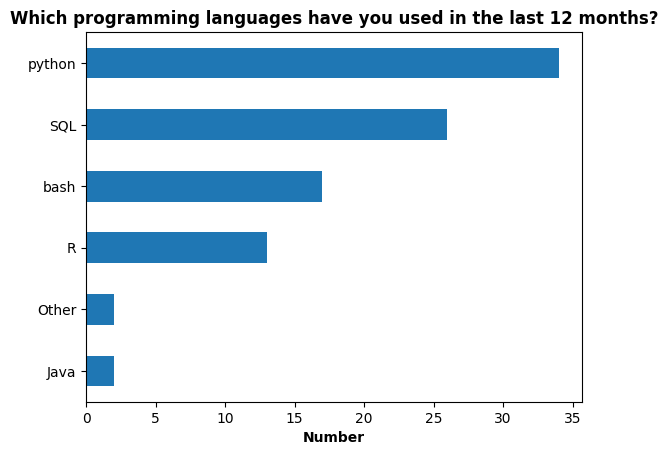

In [26]:
chosen_col = "Which programming languages have you used in the last 12 months?\xa0"

df_responses_long = split_and_explode_column(df_responses, col = chosen_col)

df_responses_long = df_responses_long.reset_index()

df_responses_long[chosen_col] = np.where(df_responses_long[chosen_col] == "SQL is NOT a programming language!!", 
                                         "",
                                         df_responses_long[chosen_col])

df_responses_long=df_responses_long[df_responses_long[chosen_col]!=""]

accepted_responses = ['R', 'python', 'SQL', 'bash','Java']

df_responses_long[chosen_col] = np.where(df_responses_long[chosen_col].isin(accepted_responses),
                                         df_responses_long[chosen_col],
                                         "Other")

df_responses_long[chosen_col].value_counts(ascending = True).plot(kind="barh", )
#plt.yticks(range(0,15));
plt.xlabel("Number", fontweight = "bold")
plt.title("Which programming languages have you used in the last 12 months?", fontweight = "bold")

Text(0.5, 1.0, 'Which organisational cloud repositories do you have access to?')

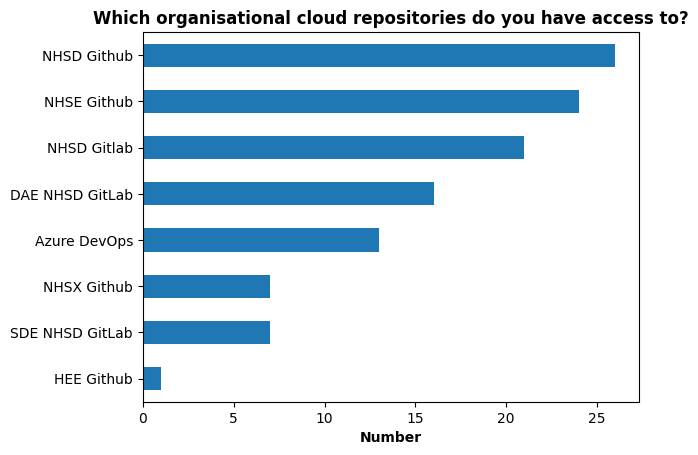

In [36]:
chosen_col = "Which organisational cloud repositories do you have access to?"

df_responses_long = split_and_explode_column(df_responses, col = chosen_col)

df_responses_long = df_responses_long.reset_index()

df_responses_long[chosen_col] = np.where(df_responses_long[chosen_col] == "requested access to NHSD Github but not been granted", 
                                         "",
                                         df_responses_long[chosen_col])

df_responses_long=df_responses_long[df_responses_long[chosen_col]!=""]

accepted_responses = df_responses_long[chosen_col].unique()


df_responses_long[chosen_col] = np.where(df_responses_long[chosen_col].isin(accepted_responses),
                                         df_responses_long[chosen_col],
                                         "Other")

df_responses_long[chosen_col].value_counts(ascending = True).plot(kind="barh", )
#plt.yticks(range(0,15));
plt.xlabel("Number", fontweight = "bold")
plt.title(chosen_col, fontweight = "bold")

Text(0.5, 1.0, 'Which dashboarding tools do you have access to?')

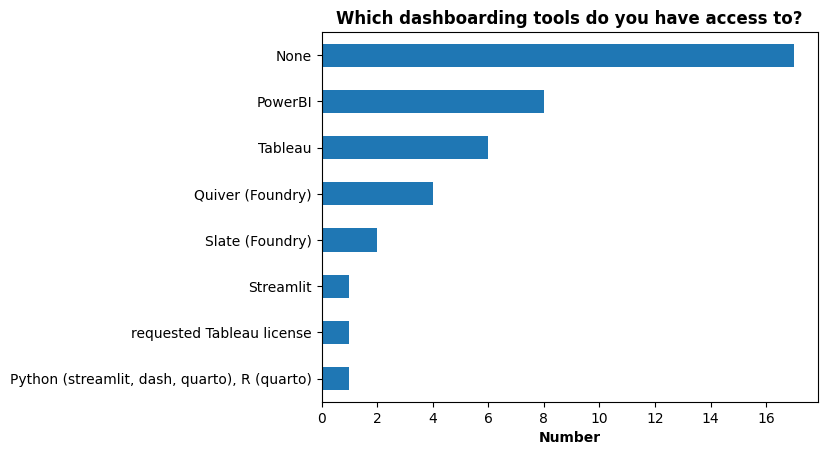

In [37]:
chosen_col = "Which dashboarding tools do you have access to?"

df_responses_long = split_and_explode_column(df_responses, col = chosen_col)

df_responses_long = df_responses_long.reset_index()

df_responses_long[chosen_col] = np.where(df_responses_long[chosen_col] == "requested access to NHSD Github but not been granted", 
                                         "",
                                         df_responses_long[chosen_col])

df_responses_long=df_responses_long[df_responses_long[chosen_col]!=""]

accepted_responses = df_responses_long[chosen_col].unique()


df_responses_long[chosen_col] = np.where(df_responses_long[chosen_col].isin(accepted_responses),
                                         df_responses_long[chosen_col],
                                         "Other")

df_responses_long[chosen_col].value_counts(ascending = True).plot(kind="barh", )
#plt.yticks(range(0,15));
plt.xlabel("Number", fontweight = "bold")
plt.title(chosen_col, fontweight = "bold")

Text(0.5, 1.0, 'Where do you store your project files?')

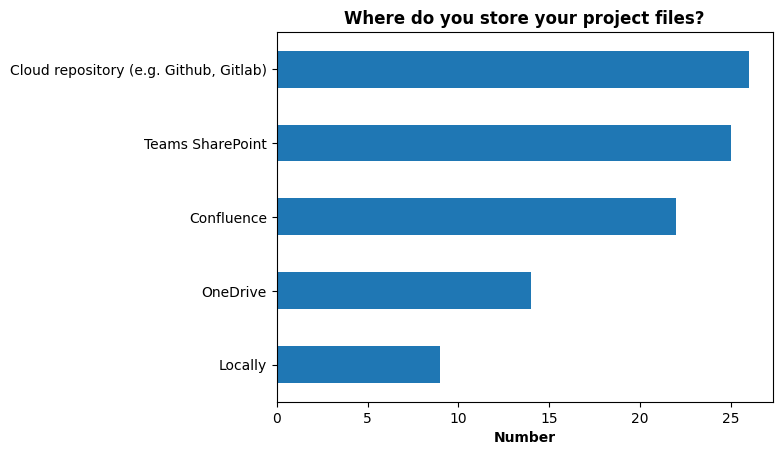

In [38]:
chosen_col = "Where do you store your project files?"

df_responses_long = split_and_explode_column(df_responses, col = chosen_col)

df_responses_long = df_responses_long.reset_index()

df_responses_long=df_responses_long[df_responses_long[chosen_col]!=""]

accepted_responses = df_responses_long[chosen_col].unique()


df_responses_long[chosen_col] = np.where(df_responses_long[chosen_col].isin(accepted_responses),
                                         df_responses_long[chosen_col],
                                         "Other")

df_responses_long[chosen_col].value_counts(ascending = True).plot(kind="barh", )
#plt.yticks(range(0,15));
plt.xlabel("Number", fontweight = "bold")
plt.title(chosen_col, fontweight = "bold")

Text(0.5, 1.0, 'What do you use as team knowledge store?\xa0')

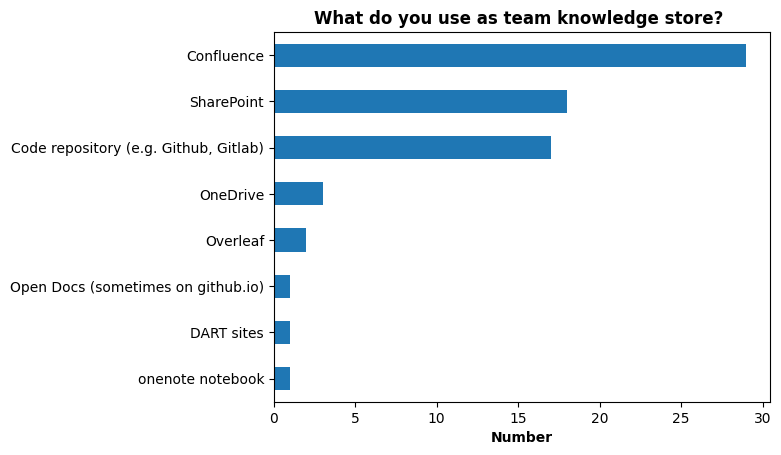

In [39]:
chosen_col = "What do you use as team knowledge store?\xa0"

df_responses_long = split_and_explode_column(df_responses, col = chosen_col)

df_responses_long = df_responses_long.reset_index()

df_responses_long=df_responses_long[df_responses_long[chosen_col]!=""]

accepted_responses = df_responses_long[chosen_col].unique()


df_responses_long[chosen_col] = np.where(df_responses_long[chosen_col].isin(accepted_responses),
                                         df_responses_long[chosen_col],
                                         "Other")

df_responses_long[chosen_col].value_counts(ascending = True).plot(kind="barh", )
#plt.yticks(range(0,15));
plt.xlabel("Number", fontweight = "bold")
plt.title(chosen_col, fontweight = "bold")

Text(0.5, 1.0, 'Which tools do you use for project management?')

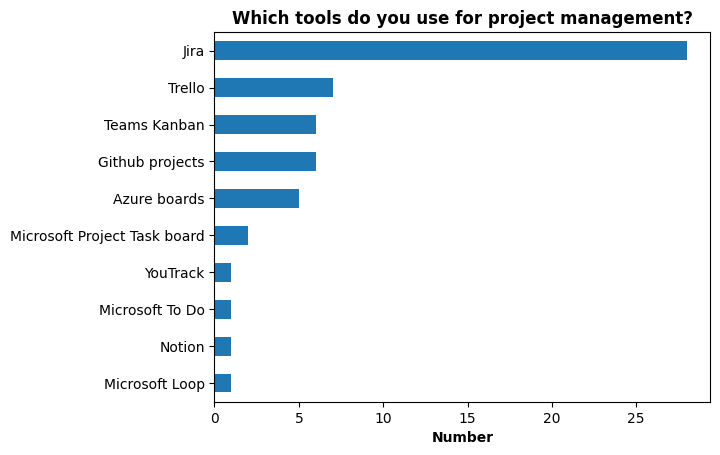

In [40]:
chosen_col = "Which tools do you use for project management?"

df_responses_long = split_and_explode_column(df_responses, col = chosen_col)

df_responses_long = df_responses_long.reset_index()

df_responses_long=df_responses_long[df_responses_long[chosen_col]!=""]

accepted_responses = df_responses_long[chosen_col].unique()


df_responses_long[chosen_col] = np.where(df_responses_long[chosen_col].isin(accepted_responses),
                                         df_responses_long[chosen_col],
                                         "Other")

df_responses_long[chosen_col].value_counts(ascending = True).plot(kind="barh", )
#plt.yticks(range(0,15));
plt.xlabel("Number", fontweight = "bold")
plt.title(chosen_col, fontweight = "bold")

Text(0.5, 1.0, 'What do you typically use for project team communication')

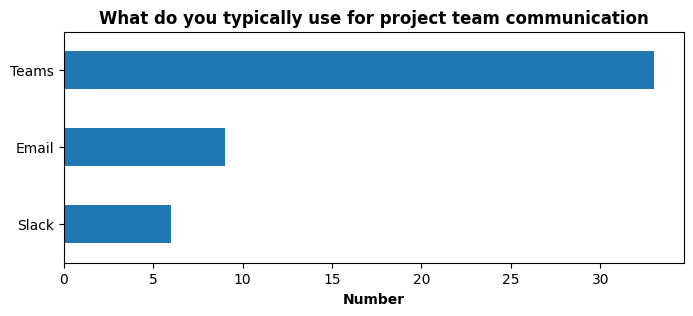

In [55]:
chosen_col = "What do you typically use for project team communication"

df_responses_long = split_and_explode_column(df_responses, col = chosen_col)

df_responses_long = df_responses_long.reset_index()

df_responses_long=df_responses_long[df_responses_long[chosen_col]!=""]

accepted_responses = df_responses_long[chosen_col].unique()


df_responses_long[chosen_col] = np.where(df_responses_long[chosen_col].isin(accepted_responses),
                                         df_responses_long[chosen_col],
                                         "Other")

df_responses_long[chosen_col].value_counts(ascending = True).plot(kind="barh", figsize=(8,3) )
#plt.yticks(range(0,15));
plt.xlabel("Number", fontweight = "bold")
plt.title(chosen_col, fontweight = "bold")

In [45]:
df_responses_long["What tools do you use for stakeholder engagement?"].unique()

array(['PowerPoint', 'Mural', 'Miro', 'Teams calls, drop in sessions',
       nan, 'Rendered markdown VERY RARELY', 'Mentimeter',
       'Microsoft Whiteboard', 'obsidian slides'], dtype=object)

Text(0.5, 1.0, 'What tools do you use for stakeholder engagement?')

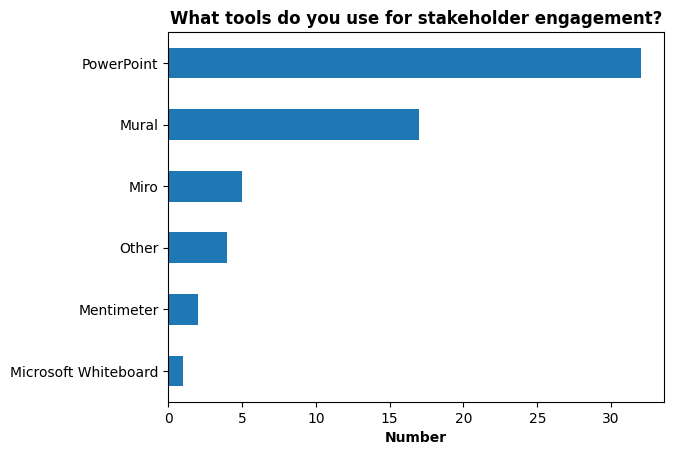

In [48]:
chosen_col = "What tools do you use for stakeholder engagement?"

accepted_responses = ['PowerPoint', 'Mural', 'Miro','Mentimeter','Microsoft Whiteboard']

df_responses_long = split_and_explode_column(df_responses, col = chosen_col)

df_responses_long = df_responses_long.reset_index()

df_responses_long=df_responses_long[df_responses_long[chosen_col]!=""]

df_responses_long[chosen_col] = np.where(df_responses_long[chosen_col] == "menti", 
                                         "Mentimeter",
                                         df_responses_long[chosen_col])

#accepted_responses = df_responses_long[chosen_col].unique()


df_responses_long[chosen_col] = np.where(df_responses_long[chosen_col].isin(accepted_responses),
                                         df_responses_long[chosen_col],
                                         "Other")

df_responses_long[chosen_col].value_counts(ascending = True).plot(kind="barh", )
#plt.yticks(range(0,15));
plt.xlabel("Number", fontweight = "bold")
plt.title(chosen_col, fontweight = "bold")

# Free text responses

In [11]:
df_pattern_of_working = pd.read_csv("pattern_of_working.csv")

In [12]:
df_pattern_of_working["Language_grouped"] = np.where(df_pattern_of_working["Language"] == "Pyspark", "Python", df_pattern_of_working["Language"])

In [13]:
df_pattern_of_working.describe()

,Language,Platform,Repo,Tool,Language_grouped
count,40,39,21,25,40
unique,4,7,3,5,3
top,Python,DAE,Github,Databricks,Python
freq,23,13,9,12,37


In [14]:
for col in df_pattern_of_working.columns:
    print(df_pattern_of_working[col].value_counts())
    print(df_pattern_of_working[col].value_counts(normalize = True))

    print("")

Python     23
Pyspark    14
SQL         2
R           1
Name: Language, dtype: int64
Python     0.575
Pyspark    0.350
SQL        0.050
R          0.025
Name: Language, dtype: float64

DAE                   13
UDAL                   9
SDE                    7
Local machine          7
AWS VM                 1
NHSX Azure for GPU     1
Azure ML               1
Name: Platform, dtype: int64
DAE                   0.333333
UDAL                  0.230769
SDE                   0.179487
Local machine         0.179487
AWS VM                0.025641
NHSX Azure for GPU    0.025641
Azure ML              0.025641
Name: Platform, dtype: float64

Github          9
Azure DevOps    9
Gitlab          3
Name: Repo, dtype: int64
Github          0.428571
Azure DevOps    0.428571
Gitlab          0.142857
Name: Repo, dtype: float64

Databricks            12
VS Code                8
Azure ML               2
Github codespace       2
Azure Data Factory     1
Name: Tool, dtype: int64
Databricks            0.48
VS 

In [15]:
df_pattern_of_working.groupby(by=["Language", "Platform", "Repo", "Tool"],
                              dropna = False).value_counts().reset_index().sort_values(by=["Platform", 0], ascending = False)

,Language,Platform,Repo,Tool,Language_grouped,0
19,Python,UDAL,Azure DevOps,Databricks,Python,3
20,Python,UDAL,Azure DevOps,VS Code,Python,3
6,Pyspark,UDAL,Azure DevOps,Databricks,Python,1
21,Python,UDAL,Github,VS Code,Python,1
25,SQL,UDAL,NaN,Databricks,SQL,1
18,Python,SDE,NaN,Databricks,Python,2
3,Pyspark,SDE,Github,NaN,Python,1
4,Pyspark,SDE,NaN,Databricks,Python,1
5,Pyspark,SDE,NaN,NaN,Python,1
17,Python,SDE,Gitlab,NaN,Python,1


In [16]:
df_pattern_of_working.groupby(by=["Platform"],
                              dropna = False)["Language_grouped"].value_counts().to_frame()

Language_grouped
Platform      Language_grouped                  
AWS VM        Python                           1
Azure ML      Python                           1
DAE           Python                          11
Local machine Python                           5
SDE           Python                           6
UDAL          Python                           8
              SQL                              1
NaN           Python                           5
              R                                1
              SQL                              1

In [17]:
df_pattern_of_working.groupby(by=["Platform","Language_grouped"],
                              dropna = False).value_counts(normalize = True).to_frame()

0
Platform      Language_grouped Language Repo         Tool             
AWS VM        Python           Python   Azure DevOps Azure ML    1.000
Local machine Python           Python   Github       VS Code     1.000
UDAL          Python           Python   Azure DevOps Databricks  0.375
                                                     VS Code     0.375
                               Pyspark  Azure DevOps Databricks  0.125
                               Python   Github       VS Code     0.125